# Laboratorio 6
Sebastian Garcia 201630047

In [1]:
##

import numpy as np

def get_np_matrix_sqr():
    N = int(input("[N] Dimension para la matriz A: ") or "1")
    arr = [[int(input(f"({x},{y}) = ") or "0") for x in range(N)] for y in range(N)]
    A = np.array(arr, float).reshape(N, N)
    print(f"\n{A}")
    
    print("\nMatriz b:")
    arr = [int(input(f"({x}) = ") or "0") for x in range(N)] 
    b = np.array(arr, float)
    print(f"\n{b}")
    
    return A, b   

### Ejercicio 1
Para un sistema matricial de la forma Ax=b, donde A es una matriz de coeficientes constantes de
NxN, x un vector de incógnitas de Nx1 y b un vector contantes de Nx1, realice una función en Python
 que devuelva el vector de solución x usando el método de Gauss-Jordan con pivote parcial (por filas).
La función debe devolver igualmente la matriz inversa A . Pruebe la función con una matriz A aleatoria (rand) de 3x3 y un vector b aleatorio de 3x1. Compare la solución encontrada con las funciones de la librería numpy del paquete linalg.

In [3]:
##
import numpy as np


A = np.array(
    [[0, 2, 0, 1],
    [2, 2, 3, 2],
    [4, -3, 0, 1],
    [6, 1, -6, -5],
    ], float
)
b = np.array([0, -2, -7, 6], float)


#A, b = get_np_matrix_sqr()

print(f'''
    Python linalg solver:
    {np.linalg.solve(A, b)}
''')

def gaussJordan(A, b):
    n = len(b)
    inv = np.linalg.inv(A)
    for k in range(n):
        # pivote parcial
        if np.fabs(A[k, k]) < 1.0e-12:
            for i in range(k+1, n):
                if np.fabs(A[i, k]) > np.fabs(A[k, k]):
                    for j in range(k, n):
                        A[k, j] , A[i, j] = A[i, j], A[k, j]
                    b[k] , b[i] = b[i], b[k]
                    break
        # division
        pivot = A[k, k]
        for j in range(k, n):
            A[k, j] /= pivot
        b[k] /= pivot
        # eliminacion
        for i in range(n):
            if i == k or A[i, k] == 0: continue
            factor = A[i, k]
            for j in range(k, n):
                A[i, j] -= factor * A[k, j]
            b[i] -= factor * b[k]
            
    return b, inv

x, A = gaussJordan(A, b)
print(f'''
    Metodo Gauss Jordan:
    {x}
    
    Matriz inversa A^-1:
{A}
''')



    Python linalg solver:
    [-0.5         1.          0.33333333 -2.        ]


    Metodo Gauss Jordan:
    [-0.5         1.          0.33333333 -2.        ]
    
    Matriz inversa A^-1:
[[-0.02564103  0.12820513  0.08974359  0.06410256]
 [ 0.17948718  0.1025641  -0.12820513  0.05128205]
 [-0.52991453  0.31623932 -0.14529915 -0.00854701]
 [ 0.64102564 -0.20512821  0.25641026 -0.1025641 ]]



### Ejercicio 2
 Para una regresión lineal de la forma ŷ(x)=a1 x+a0 , demuestre que los coeficientes a1 y a0 están dados por:
N
∑[(xi− ̄x)(yi− ̄y)]
i=1 011N
a = ̄y−a x y a =
entre x y y, y el denominador a la varianza de x, N al número total de pares de puntos (x, y) y
 ∑(x− ̄x)2
, donde el numerador de a1 corresponde a la covarianza  ̄x y
i i=1
 ̄y a la media (promedio) de x y y respectivamente.

### Ejercicio 3
Realice una función en Python que a partir de un conjunto de datos (x, y), devuelva los coeficientes de la regresión lineal que más se ajusta al conjunto de puntos usando el método de los mínimos cuadrados. Utilice la forma matricial de la regresión lineal para hallar los coeficientes, y use el método de Gauss-Jordan implementado en el punto 1 para hallar la solución. Para validar el método se proveen los archivos Lab-Reg-X.bin y Lab-Reg-Y.bin los cuales contienen una serie de puntos (x, y), almacenados en formato binario de tipo ‘double’. Halle los coeficientes de la regresión lineal de esta serie de puntos usando la función desarrollada y compare la solución con las funciones polyfit de numpy. Realice una gráfica que contenga los puntos (x, y) y la recta encontrada. Puede usar la función polyval de numpy.


        Matriz inversa A^-1:
    [[ 4.34530082 -0.3169745 ]
 [-0.3169745   0.03003402]]

        Python linalg solver:
        [17.83409985  4.73601966]

        Metodo Gauss Jordan:
        [17.83409985  4.73601966]

        Coeficientes
        a0 = 17.8341
        a1 = 4.7360
    

    Plot



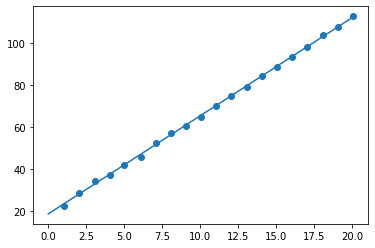


    Polyfit



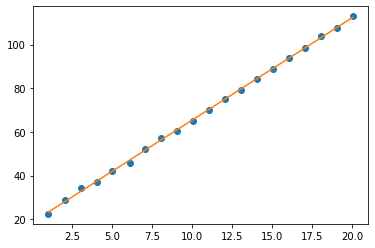


    Polyval



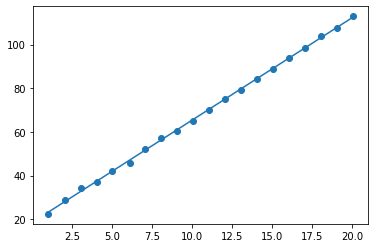

In [71]:
##
import struct
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

'''
| 1   x'        |  | a0 |       |  y'         |
|               |  |    |   =   |             |
| x'  mean(x^2) |  | a1 |       |  mean(x*y)  |
'''

x_file_name = "Lab-Reg-X.bin"
y_file_name = "Lab-Reg-Y.bin"

valores_x = []
valores_y = []

with open(x_file_name, 'rb') as f:
    x = f.read()
    valores_x = np.double(struct.unpack("d"*int(len(x)/8), x)) 
    
with open(y_file_name, 'rb') as f:
    y = f.read()
    valores_y = np.double(struct.unpack("d"*int(len(y)/8), y)) 

    
def get_coeficientes(valores_x=[], valores_y=[]):
    '''
    Retorna los coeficientes para de la regresión lineal 
    que más se ajusta al conjunto de puntos usando el método 
    de los mínimos cuadrados.
    '''
    # promedios valores de la matriz
    mean_x = np.mean(valores_x)
    mean_y = np.mean(valores_y)

    mean_x_sqr = np.mean([x ** 2 for x in valores_x])
    mean_x_y = np.mean([valores_x[i] * valores_y[i] for i in range(len(valores_x))])

    A = np.array(
        [
            [1, mean_x],
            [mean_x, mean_x_sqr]
        ], float
    )

    b = np.array(
        [
            mean_y, mean_x_y
        ], float
    )

    x, Ainv = gaussJordan(A, b)
    a0 = x[0]
    a1 = x[1]

    print(f'''
        Matriz inversa A^-1:
    {Ainv}

        Python linalg solver:
        {np.linalg.solve(A, b)}''')

    print(f'''
        Metodo Gauss Jordan:
        {x}

        Coeficientes
        a0 = {x[0]:0.4f}
        a1 = {x[1]:0.4f}
    ''')
    
    return a0, a1

#
a0, a1 = get_coeficientes(valores_x, valores_y)

# Grafica Regresion
x = valores_x.reshape(-1, 1)
y = a1 * x + a0 + np.random.normal(size=x.shape)

# modelo de regresion
model = LinearRegression()
model.fit(x, y)

# prediccion de y
x_new = np.linspace(0, 20, 100)
y_new = model.predict(x_new[:, np.newaxis])

# resultados
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.axis('tight')

print(f"""
    Plot
""")
plt.show()


print(f"""
    Polyfit
""")
a = [i[0] for i in x]
m, b = np.polyfit(a, y, 1)
plt.plot(a, y, 'o')
plt.plot(a, m*a + b)
plt.show()

print(f"""
    Polyval
""")
yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.scatter(x,y)
plt.show()

### Ejercicio 4
Del libro King and Mody, 2010 (referencia 2 del programa), realizar el problema 2.15. Presentar los resultados y figuras respectivas en Python. Utilice la función desarrollada en el punto 3 y compare los resultados con las funciones nativas de numpy (polyfit y polyval).

18
18

        Matriz inversa A^-1:
    [[1630.67370581 -160.62052623]
 [-160.62052623   15.83074781]]

        Python linalg solver:
        [-3.20443129  1.42265654]

        Metodo Gauss Jordan:
        [-3.20443129  1.42265654]

        Coeficientes
        a0 = -3.2044
        a1 = 1.4227
    

    Plot



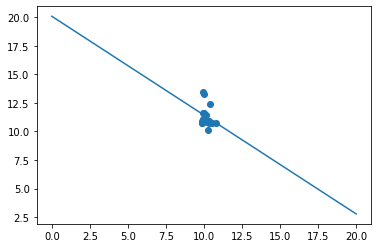


    Polyfit



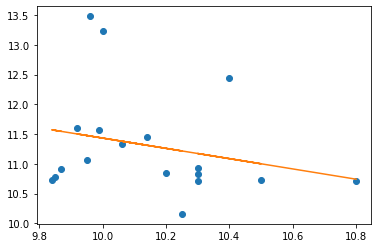


    Polyval



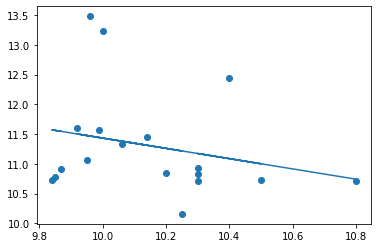

In [80]:
##

# valores
x_file_name = "Lab-Reg-X.bin"
y_file_name = "Lab-Reg-Y.bin"

# desde 1928 usando entradas validas para hombres y mujeres
#valores_x = np.array([1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004])
# hombres
valores_x = np.array([10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85], float)
#mujeres
valores_y = np.array([12.20, 11.90, 11.50, 11.90, 11.50, 11.50, 11.00, 11.40, 11.08, 11.07, 11.08, 11.06, 10.97, 10.54, 10.82, 10.94, 10.75, 10.93], float)


print(len(anos))
print(len(valores_x))

# Coeficientes
a0, a1 = get_coeficientes(valores_x, valores_y)

# Grafica Regresion
x = valores_x.reshape(-1, 1)
y = a1 * x + a0 + np.random.normal(size=x.shape)

# modelo de regresion
model = LinearRegression()
model.fit(x, y)

# prediccion de y
x_new = np.linspace(0, 20, 100)
y_new = model.predict(x_new[:, np.newaxis])

# resultados
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.axis('tight')

print(f"""
    Plot
""")
plt.show()


print(f"""
    Polyfit
""")
a = [i[0] for i in x]
m, b = np.polyfit(a, y, 1)
plt.plot(a, y, 'o')
plt.plot(a, m*a + b)
plt.show()

print(f"""
    Polyval
""")
yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.scatter(x,y)
plt.show()